# 2D Fourier Transform - introduction

<a id='ref'></a>
## References

* Yilmaz, Öz (2001). Seismic Data Analysis: Processing, Inversion, and Interpretation of Seismic Data, 2 ed.: Society of Exploration Geophysicists. ISBN 1-56080-098-4

In [1]:
import numpy as np
from scipy.fft import fft2, ifft2, fftshift, ifftshift, fftfreq
import matplotlib.pyplot as plt
import my_functions as mfun

<a id='sec1'></a>
## Fourier transform example

In [2]:
# number of samples
M = 200
N = 100

In [3]:
# period (in meters)
Tx = 2
Ty = 1

In [4]:
# sampling interval (is meters)
dx = Tx/M
dy = Ty/N
print(dx)
print(dy)

0.01
0.01


In [5]:
# x and y (in meters)
x = np.linspace(0, M*dx, M)
y = np.linspace(0, N*dy, N)
y, x = np.meshgrid(y, x)

In [6]:
x[:5,:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01005025, 0.01005025, 0.01005025, 0.01005025, 0.01005025],
       [0.0201005 , 0.0201005 , 0.0201005 , 0.0201005 , 0.0201005 ],
       [0.03015075, 0.03015075, 0.03015075, 0.03015075, 0.03015075],
       [0.04020101, 0.04020101, 0.04020101, 0.04020101, 0.04020101]])

In [7]:
y[:5,:5]

array([[0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404],
       [0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404],
       [0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404],
       [0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404],
       [0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404]])

In [8]:
# auxiliary function to create our synthetic signal
def synthetic_signal_2d(A, u, v, x, y):
    assert x.shape == y.shape, 'x and y must have the same shape'
    assert len(A) == len(u) == len(v), 'A, u and v must have the same length'
    signal = np.zeros((x.shape))
    for Amn, um, vn in zip(A, u, v):
        signal += Amn*np.cos(2*np.pi*(um*x + vn*y))
    return signal

In [9]:
# We are gonna to create a signal formed by three sinusoid components.
# The lists below contain the wavenumbers u and v (in 1/m) and the 
# amplitude A of each component.
u = [10, -10, 50]
v = [15,  15, 50]
A = [10, -15, 50]

In [10]:
# This is our synthetic signal
signal = synthetic_signal_2d(A, u, v, x, y)

In [11]:
# These are the components forming our synthetic signal
signal1 = synthetic_signal_2d([A[0]], [u[0]], [v[0]], x, y)
signal2 = synthetic_signal_2d([A[1]], [u[1]], [v[1]], x, y)
signal3 = synthetic_signal_2d([A[2]], [u[2]], [v[2]], x, y)

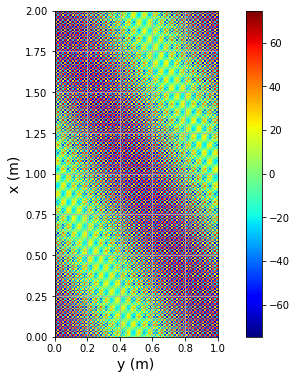

In [12]:
plt.figure(figsize=(10,6))
plt.axis('scaled')
plt.pcolormesh(y, x, signal, cmap='jet')
plt.colorbar()
plt.xlabel('y (m)', fontsize=14)
plt.ylabel('x (m)', fontsize=14)
plt.xlim(np.min(y), np.max(y))
plt.ylim(np.min(x), np.max(x))
plt.grid()
plt.show()

In [13]:
# Fourier Transform of our signal
FT_signal = fft2(x=signal, norm=None)

In [14]:
# Amplitude spectra of our signal
Amplitude = np.abs(FT_signal)

# For convenience, the amplitude is normalized by its maximum value
Amplitude /= np.max(Amplitude)

In [15]:
# Frequencies contained in our signal
u_freqs = fftfreq(n=M, d=dx)
v_freqs = fftfreq(n=N, d=dy)
v_freqs, u_freqs = np.meshgrid(v_freqs, u_freqs)

In [16]:
# Minimum and maximum frequency values
print(np.min(u_freqs), np.max(u_freqs))
print(np.min(v_freqs), np.max(v_freqs))

-50.0 49.5
-50.0 49.0


In [17]:
# The maximum absolute frequency is defined by the sampling interval dt 
print(1/(2*dx), 1/(2*dy))

50.0 50.0


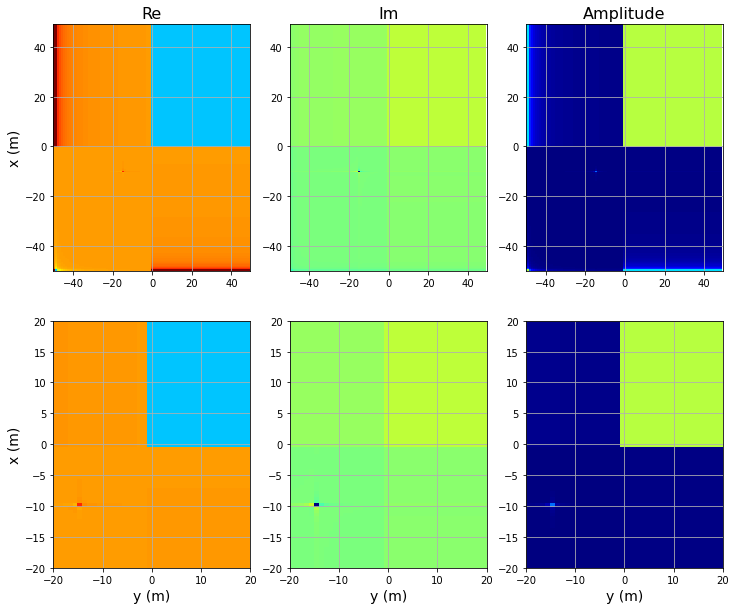

In [18]:
plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
#plt.axis('scaled')
plt.title('Re', fontsize=16)
plt.pcolormesh(v_freqs, u_freqs, FT_signal.real, cmap='jet')
#plt.colorbar()
#plt.xlabel('y (m)', fontsize=14)
plt.ylabel('x (m)', fontsize=14)
plt.xlim(np.min(u_freqs), np.max(u_freqs))
plt.ylim(np.min(v_freqs), np.max(v_freqs))
plt.grid()

plt.subplot(2,3,2)
#plt.axis('scaled')
plt.title('Im', fontsize=16)
plt.pcolormesh(v_freqs, u_freqs, FT_signal.imag, cmap='jet')
#plt.colorbar()
#plt.xlabel('y (m)', fontsize=14)
#plt.ylabel('x (m)', fontsize=14)
plt.xlim(np.min(u_freqs), np.max(u_freqs))
plt.ylim(np.min(v_freqs), np.max(v_freqs))
plt.grid()

plt.subplot(2,3,3)
#plt.axis('scaled')
plt.title('Amplitude', fontsize=16)
plt.pcolormesh(v_freqs, u_freqs, Amplitude, cmap='jet')
#plt.colorbar()
#plt.xlabel('y (m)', fontsize=14)
#plt.ylabel('x (m)', fontsize=14)
plt.xlim(np.min(u_freqs), np.max(u_freqs))
plt.ylim(np.min(v_freqs), np.max(v_freqs))
plt.grid()

plt.subplot(2,3,4)
#plt.axis('scaled')
#plt.title('Re', fontsize=16)
plt.pcolormesh(v_freqs, u_freqs, FT_signal.real, cmap='jet')
#plt.colorbar()
plt.xlabel('y (m)', fontsize=14)
plt.ylabel('x (m)', fontsize=14)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.grid()

plt.subplot(2,3,5)
#plt.axis('scaled')
#plt.title('Im', fontsize=16)
plt.pcolormesh(v_freqs, u_freqs, FT_signal.imag, cmap='jet')
#plt.colorbar()
plt.xlabel('y (m)', fontsize=14)
#plt.ylabel('x (m)', fontsize=14)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.grid()

plt.subplot(2,3,6)
#plt.axis('scaled')
#plt.title('Amplitude', fontsize=16)
plt.pcolormesh(v_freqs, u_freqs, Amplitude, cmap='jet')
#plt.colorbar()
plt.xlabel('y (m)', fontsize=14)
#plt.ylabel('x (m)', fontsize=14)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.grid()


plt.show()